In [1]:
import pandas as pd
import numpy as np


In [2]:
train = pd.read_csv('./data/Train.csv')
test = pd.read_csv('./data/Test.csv')


In [3]:
train.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0


In [4]:
test.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC
0,test_id_0,2016-05-04,TU 0700,DJE,TUN,2016-05-04 06:40:00,2016-05-04 07.30.00,ATA,TU 32AIMF
1,test_id_1,2016-05-05,TU 0395,TUN,BKO,2016-05-05 15:20:00,2016-05-05 20.05.00,ATA,TU 320IMW
2,test_id_2,2016-05-06,TU 0745,FRA,TUN,2016-05-06 10:00:00,2016-05-06 12.25.00,ATA,TU 32AIMC
3,test_id_3,2016-05-11,TU 0848,BEY,TUN,2016-05-11 09:40:00,2016-05-11 13.10.00,ATA,TU 31BIMO
4,test_id_4,2016-05-11,TU 0635,ORY,MIR,2016-05-11 09:50:00,2016-05-11 12.35.00,ATA,TU 736IOQ


In [5]:
train.tail()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
107828,train_id_107828,2018-07-05,WKL 0000,TUN,TUN,2018-07-05 23:00:00,2018-07-06 02.00.00,SCH,TU 32AIML,0.0
107829,train_id_107829,2018-01-13,UG 0003,DJE,TUN,2018-01-13 08:00:00,2018-01-13 09.00.00,SCH,UG AT7AT7,0.0
107830,train_id_107830,2018-11-07,SGT 0000,TUN,TUN,2018-11-07 05:00:00,2018-11-07 12.50.00,SCH,TU 736IOK,0.0
107831,train_id_107831,2018-01-23,UG 0010,TUN,DJE,2018-01-23 18:00:00,2018-01-23 18.45.00,ATA,TU CR9ISA,0.0
107832,train_id_107832,2018-11-13,UG 0002,TUN,DJE,2018-11-13 06:15:00,2018-11-13 07.05.00,SCH,TU CR9ISA,0.0


In [6]:
train.shape

(107833, 10)

In [7]:
test.shape

(9333, 9)

In [8]:
train.isnull().sum()

ID        0
DATOP     0
FLTID     0
DEPSTN    0
ARRSTN    0
STD       0
STA       0
STATUS    0
AC        0
target    0
dtype: int64

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107833 entries, 0 to 107832
Data columns (total 10 columns):
ID        107833 non-null object
DATOP     107833 non-null object
FLTID     107833 non-null object
DEPSTN    107833 non-null object
ARRSTN    107833 non-null object
STD       107833 non-null object
STA       107833 non-null object
STATUS    107833 non-null object
AC        107833 non-null object
target    107833 non-null float64
dtypes: float64(1), object(9)
memory usage: 8.2+ MB


In [10]:
train["DEPSTN"].head()


0    CMN
1    MXP
2    TUN
3    DJE
4    TUN
Name: DEPSTN, dtype: object

In [11]:
train["ARRSTN"].unique()

array(['TUN', 'IST', 'NTE', 'ALG', 'BCN', 'ORY', 'FCO', 'NCE', 'MRS',
       'MED', 'FRA', 'BRU', 'DJE', 'LYS', 'CMN', 'BEG', 'OUA', 'GVA',
       'MXP', 'BEY', 'MAD', 'JED', 'ABJ', 'VIE', 'MLA', 'BLQ', 'SFA',
       'LIS', 'LHR', 'CDG', 'MIR', 'CAI', 'DUS', 'HAM', 'NBE', 'ZRH',
       'AMS', 'NDR', 'TLS', 'VCE', 'SXB', 'MUC', 'LGW', 'CRL', 'ORN',
       'DKR', 'BOD', 'SXF', 'LJU', 'OST', 'NKC', 'BKO', 'TOE', 'AHU',
       'YUL', 'PRG', 'CPH', 'ARN', 'OUD', 'BRQ', 'GAF', 'JIB', 'BUD',
       'OPO', 'KGL', 'NIM', 'SVO', 'LIL', 'OSR', 'EBL', 'TNG', 'PSA',
       'CGN', 'AYT', 'GAE', 'NAP', 'BJA', 'KRT', 'LFW', 'TBJ', 'PMO',
       'TMR', 'FBM', 'RAK', 'GNB', 'ESB', 'CZL', 'LBV', 'KSC', 'CKY',
       'AMM', 'LED', 'BTS', 'MVB', 'HBE', 'OTP', 'CAG', 'VNO', 'TRN',
       'ATH', 'ADB', 'SKG', 'BYJ', 'DSS', 'COO', 'IEV', 'LUX', 'KBP',
       'DOH', 'FIH', 'EBM', 'BDS', 'VKO', 'AAE', 'BLL', 'HAJ', 'BRI',
       'CTA', 'VRN', 'SKX', 'VOG', 'BGY', 'LAD', 'KRR', 'SJJ', 'GHA',
       'RTM', 'TPS']

# Feature Engineering

In [12]:
train['Flight'] = train['DEPSTN'] + '-->' + train['ARRSTN']
test['Flight'] = test['DEPSTN'] + '-->' + test['ARRSTN']

In [13]:
train['DATOP'] = pd.to_datetime(train['DATOP'], format='%Y-%m-%d')
test['DATOP'] = pd.to_datetime(test['DATOP'], format='%Y-%m-%d')


In [14]:
train['Year'] = train['DATOP'].dt.year
test['Year'] = test['DATOP'].dt.year

train['Month'] = train['DATOP'].dt.month
test['Month'] = test['DATOP'].dt.month

train['Day'] = train['DATOP'].dt.day
test['Day'] = test['DATOP'].dt.day



In [15]:
train['Day_of_week'] = train['DATOP'].dt.dayofweek
test['Day_of_week'] = test['DATOP'].dt.dayofweek


In [16]:
train['Week_of_year'] = train['DATOP'].dt.week
test['Week_of_year'] = test['DATOP'].dt.week

In [17]:
data = [train, test]
for dataset in data:
    dataset.loc[ dataset['Day'] <= 7, 'WeekofMonth'] = 0
    dataset.loc[(dataset['Day'] > 7) & (dataset['Day'] <= 14), 'WeekofMonth'] = 1
    dataset.loc[(dataset['Day'] > 14) & (dataset['Day'] <= 21), 'WeekofMonth'] = 2
    dataset.loc[(dataset['Day'] > 21) & (dataset['Day'] <= 28), 'WeekofMonth'] = 3
    dataset.loc[(dataset['Day'] > 28) & (dataset['Day'] <= 31), 'WeekofMonth'] = 4
    dataset['WeekofMonth'] = dataset['WeekofMonth'].astype(int)

In [18]:
data = [train, test]
for dataset in data:
    dataset.loc[ (dataset['Month'] < 3) | (dataset['Month'] == 12), 'Season'] = 0
    dataset.loc[(dataset['Month'] >= 3) & (dataset['Month'] < 6), 'Season'] = 1
    dataset.loc[(dataset['Month'] >= 6) & (dataset['Month'] < 9), 'Season'] = 2
    dataset.loc[(dataset['Month'] >= 9) & (dataset['Month'] < 12), 'Season'] = 3
    dataset['Season'] = dataset['Season'].astype(int)

In [19]:

data = [train, test]
for dataset in data:
    dataset.loc[ dataset['Month'] == 1, 'DayofYear'] = dataset['Day']
    dataset.loc[ dataset['Month'] == 2, 'DayofYear'] = dataset['Day'] + 31
    dataset.loc[ dataset['Month'] == 3, 'DayofYear'] = dataset['Day'] + 31 + 28
    dataset.loc[ dataset['Month'] == 4, 'DayofYear'] = dataset['Day'] + 31 +28 + 31
    dataset.loc[ dataset['Month'] == 5, 'DayofYear'] = dataset['Day'] + 31 +28 + 31 + 30 
    dataset.loc[ dataset['Month'] == 6, 'DayofYear'] = dataset['Day'] + 31 +28 + 31 + 30 +31
    dataset.loc[ dataset['Month'] == 7, 'DayofYear'] = dataset['Day'] + 31 +28 + 31 + 30 +31+ 30
    dataset.loc[ dataset['Month'] == 8, 'DayofYear'] = dataset['Day'] + 31 +28 + 31 + 30 +31+ 30 + 31
    dataset.loc[ dataset['Month'] == 9, 'DayofYear'] = dataset['Day']  + 31 +28 + 31 + 30 +31+ 30 + 31 +31
    dataset.loc[ dataset['Month'] == 10, 'DayofYear'] = dataset['Day']  + 31 +28 + 31 + 30 +31+ 30 + 31 +31 +30
    dataset.loc[ dataset['Month'] == 11, 'DayofYear'] = dataset['Day'] + 31 +28 + 31 + 30 +31+ 30 + 31 +31 +30 + 31
    dataset.loc[ dataset['Month'] == 12, 'DayofYear'] = dataset['Day'] + 31 +28 + 31 + 30 +31+ 30 + 31 +31 +30 + 31+30 
    dataset['DayofYear'] = dataset['DayofYear'].astype(int)

In [20]:
#'%Y-%m-%d-%H:%M:%S'
train['STD'] = pd.to_datetime(train['STD'], format='%Y-%m-%d %H:%M:%S')
test['STD'] = pd.to_datetime(test['STD'], format='%Y-%m-%d %H:%M:%S')


#'%Y-%m-%d-%H:%M:%S'
train['STA'] = pd.to_datetime(train['STA'], format='%Y-%m-%d %H.%M.%S')
test['STA'] = pd.to_datetime(test['STA'], format='%Y-%m-%d %H.%M.%S')




In [21]:
train['Hour_of_go'] = train['STD'].dt.hour 
test['Hour_of_go'] = test['STD'].dt.hour



train['Hour_of_came'] = train['STA'].dt.hour 
test['Hour_of_came'] = test['STA'].dt.hour

In [22]:
train['Minute_of_go'] = train['STD'].dt.minute 
test['Minute_of_go'] = test['STD'].dt.minute



train['Minute_of_came'] = train['STA'].dt.minute 
test['Minute_of_came'] = test['STA'].dt.minute

In [23]:
train['Flight_Duration_hour'] = train['Hour_of_came'] - train['Hour_of_go'] 
test['Flight_Duration_hour'] = test['Hour_of_came'] - test['Hour_of_go'] 


In [24]:
train['Flight_Duration_minute'] = ((train['Hour_of_came']*60) +train['Minute_of_came'] ) - ((train['Hour_of_go']*60 )+train['Minute_of_go'])
test['Flight_Duration_minute'] = ((test['Hour_of_came']*60) +test['Minute_of_came'] ) - ((test['Hour_of_go']*60 )+test['Minute_of_go'])


In [25]:
train['S_hour_go'] = np.sin(2*np.pi*train['Hour_of_go']/24)
train['C_hour_go'] = np.cos(2*np.pi*train['Hour_of_go']/24)
test['S_hour_go'] = np.sin(2*np.pi*test['Hour_of_go']/24)
test['C_hour_go'] = np.cos(2*np.pi*test['Hour_of_go']/24)




train['S_hour_came'] = np.sin(2*np.pi*train['Hour_of_came']/24)
train['C_hour_came'] = np.cos(2*np.pi*train['Hour_of_came']/24)
test['S_hour_came'] = np.sin(2*np.pi*test['Hour_of_came']/24)
test['C_hour_came'] = np.cos(2*np.pi*test['Hour_of_came']/24)

In [26]:


data = [train, test]
for dataset in data:
    dataset.loc[ (dataset['Hour_of_go'] < 12) , 'Hour_of_go_AM_PM'] = 0
    dataset.loc[(dataset['Hour_of_go'] >= 12) , 'Hour_of_go_AM_PM'] = 1
    dataset['Hour_of_go_AM_PM'] = dataset['Hour_of_go_AM_PM'].astype(int)
    
    

data = [train, test]
for dataset in data:
    dataset.loc[ (dataset['Hour_of_came'] < 12) , 'Hour_of_came_AM_PM'] = 0
    dataset.loc[(dataset['Hour_of_came'] >= 12) , 'Hour_of_came_AM_PM'] = 1
    dataset['Hour_of_came_AM_PM'] = dataset['Hour_of_came_AM_PM'].astype(int)

In [27]:
train.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,...,Minute_of_go,Minute_of_came,Flight_Duration_hour,Flight_Duration_minute,S_hour_go,C_hour_go,S_hour_came,C_hour_came,Hour_of_go_AM_PM,Hour_of_came_AM_PM
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,ATA,TU 32AIMN,260.0,...,30,55,2,145,0.500000,-0.866025,1.224647e-16,-1.000000e+00,0,1
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16:55:00,ATA,TU 31BIMO,20.0,...,5,55,1,110,-0.707107,-0.707107,-8.660254e-01,-5.000000e-01,1,1
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06:45:00,ATA,TU 32AIMN,0.0,...,10,45,2,155,0.866025,0.500000,1.000000e+00,6.123234e-17,0,0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17:00:00,ATA,TU 736IOK,0.0,...,10,0,3,170,-0.500000,-0.866025,-9.659258e-01,-2.588190e-01,1,1
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15:50:00,ATA,TU 320IMU,22.0,...,30,50,1,80,-0.500000,-0.866025,-7.071068e-01,-7.071068e-01,1,1


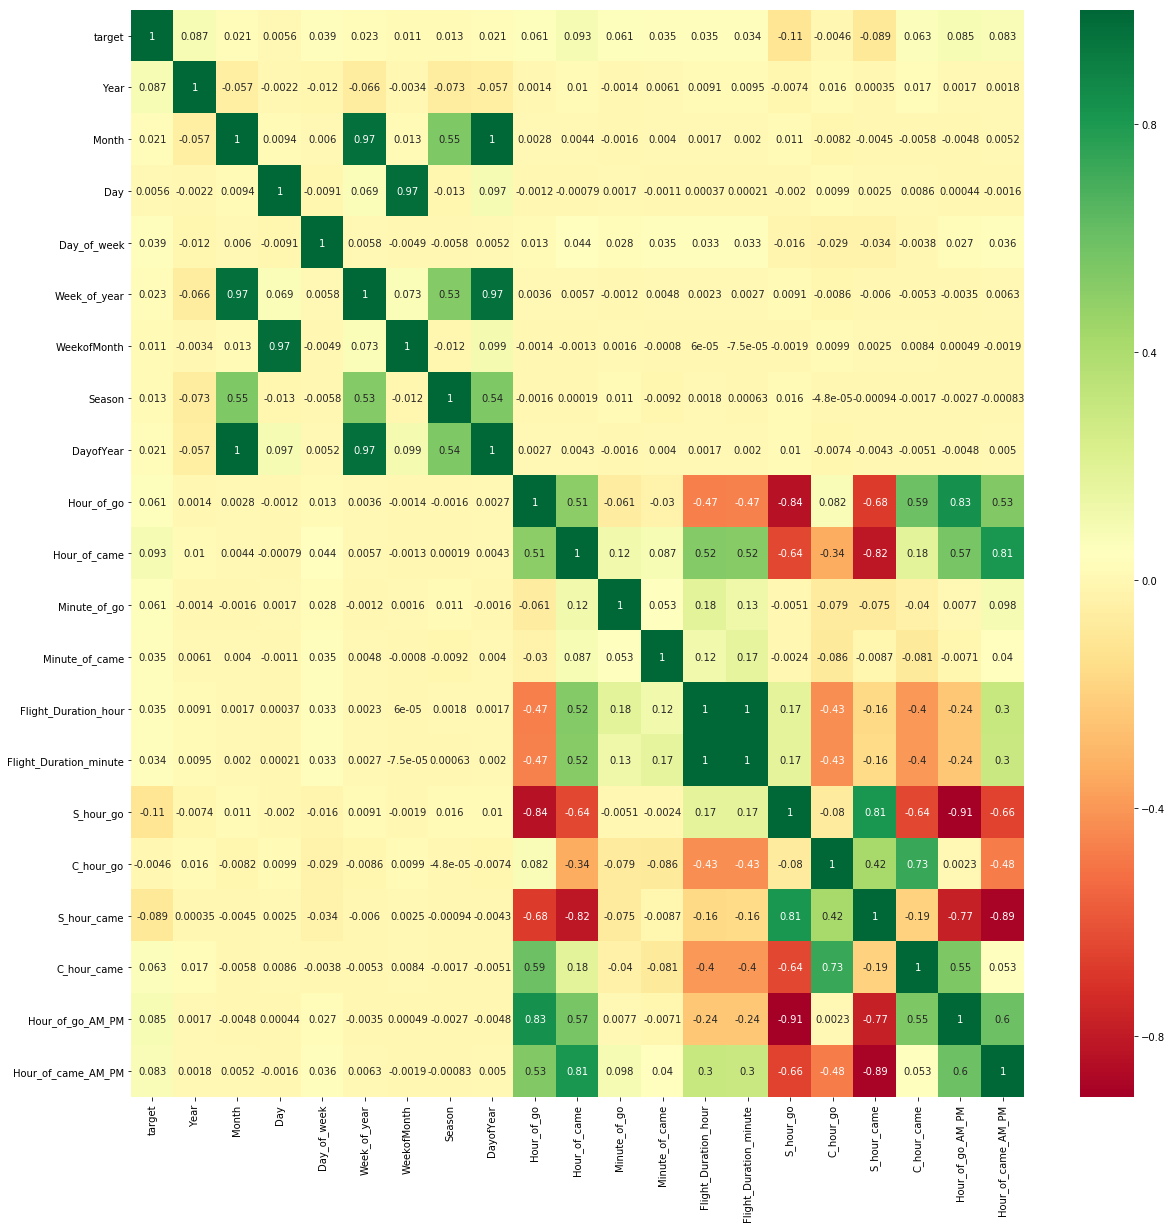

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



corrmat = train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [29]:
train.columns


Index(['ID', 'DATOP', 'FLTID', 'DEPSTN', 'ARRSTN', 'STD', 'STA', 'STATUS',
       'AC', 'target', 'Flight', 'Year', 'Month', 'Day', 'Day_of_week',
       'Week_of_year', 'WeekofMonth', 'Season', 'DayofYear', 'Hour_of_go',
       'Hour_of_came', 'Minute_of_go', 'Minute_of_came',
       'Flight_Duration_hour', 'Flight_Duration_minute', 'S_hour_go',
       'C_hour_go', 'S_hour_came', 'C_hour_came', 'Hour_of_go_AM_PM',
       'Hour_of_came_AM_PM'],
      dtype='object')

# Model Training

In [30]:
#'DATOP','STD', 'STA',, 'AC' , 'WeekofMonth','Season','Minute_of_came','Flight_Duration_hour','Minute_of_go'

train_columns = [ 'DEPSTN','ARRSTN','STATUS', 'AC','Flight', 'Year', 'Month', 'Day', 'Minute_of_came',
        'DayofYear','Hour_of_go', 'Hour_of_came','Flight_Duration_minute','Flight_Duration_hour','Minute_of_go', 'DATOP' ,'Day_of_week','FLTID','Week_of_year','S_hour_go',
       'C_hour_go', 'S_hour_came', 'C_hour_came']#,'Hour_of_came_AM_PM', 'Hour_of_go_AM_PM','Timedelta'

target = 'target'
X = train[train_columns]
Y = train[target]
x_test = test[train_columns]

In [31]:
X.head()

,DEPSTN,ARRSTN,STATUS,AC,Flight,Year,Month,Day,Minute_of_came,DayofYear,...,Flight_Duration_hour,Minute_of_go,DATOP,Day_of_week,FLTID,Week_of_year,S_hour_go,C_hour_go,S_hour_came,C_hour_came
0,CMN,TUN,ATA,TU 32AIMN,CMN-->TUN,2016,1,3,55,3,...,2,30,2016-01-03,6,TU 0712,53,0.500000,-0.866025,1.224647e-16,-1.000000e+00
1,MXP,TUN,ATA,TU 31BIMO,MXP-->TUN,2016,1,13,55,13,...,1,5,2016-01-13,2,TU 0757,2,-0.707107,-0.707107,-8.660254e-01,-5.000000e-01
2,TUN,IST,ATA,TU 32AIMN,TUN-->IST,2016,1,16,45,16,...,2,10,2016-01-16,5,TU 0214,2,0.866025,0.500000,1.000000e+00,6.123234e-17
3,DJE,NTE,ATA,TU 736IOK,DJE-->NTE,2016,1,17,0,17,...,3,10,2016-01-17,6,TU 0480,2,-0.500000,-0.866025,-9.659258e-01,-2.588190e-01
4,TUN,ALG,ATA,TU 320IMU,TUN-->ALG,2016,1,17,50,17,...,1,30,2016-01-17,6,TU 0338,2,-0.500000,-0.866025,-7.071068e-01,-7.071068e-01


In [32]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val  = train_test_split(X, Y ,test_size=0.20 ,random_state=17 )

In [33]:
#pip install catboost

In [34]:
categ_feat_idx = np.where(x_train.dtypes == 'object')[0]
categ_feat_idx

array([ 0,  1,  2,  3,  4, 17], dtype=int64)

In [35]:
from catboost import CatBoostRegressor
model = CatBoostRegressor(iterations=700,depth= 10, l2_leaf_reg= 7, learning_rate= 0.1) 
#depth= 10, l2_leaf_reg= 7, learning_rate= 0.1
model.fit(x_train,y_train,verbose=False,cat_features=categ_feat_idx)

In [36]:
predictions = model.predict(x_val)

In [37]:
from sklearn.metrics import mean_squared_error

from math import sqrt

rmse = sqrt(mean_squared_error(y_val,predictions))

print(rmse)

106.29765189132034


In [38]:
importances = pd.DataFrame({'feature':X.columns,'importance':np.round(model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
FLTID,12.877
DATOP,10.937
AC,10.479
DayofYear,9.162
Flight,6.940
Day,5.914
DEPSTN,5.857
Day_of_week,4.779
ARRSTN,4.332


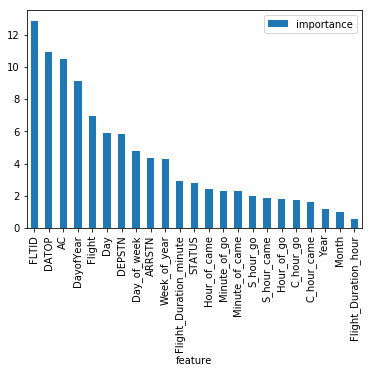

In [39]:
importances.plot.bar()

In [40]:
y_pred = model.predict(x_test)



In [41]:
any(y_pred<0)

True

In [42]:
y_pred[y_pred < 0] =0

In [43]:
any(y_pred<0)

False

In [44]:
submission= pd.DataFrame({'ID':test["ID"],'target':y_pred})
submission.to_csv("submission.csv",index=False)